In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # graphics - not preferred
%matplotlib inline
import seaborn as sns # graphics - preferred

from scipy import stats
import statsmodels.api as sm # models - not preferred
from sklearn import linear_model # models - preferred

# get current working directory. Useful if getting errors about file loading.
import os

print os.getcwd()
print

# create a dataframe names 'dates' with the values specified below)
# dates = pd.date_range('20140101',periods=6)
# dates

df_raw = pd.read_csv("../final-project/data/17_11_Unit_Level_Peril_Fire.csv")

# drop all rows with one or more values that are not available
# df = df_raw.dropna() 

df = df_raw

# print the first record in the dataframe called df
# print df.head(1)

# print the coloumn names of the columns in the dataframe called df
print df.columns.values
# print

# print the index values of the rows in the dataframe called df
# print df.index.values

# print the number of rows in the dataframe called df
print len(df)
print

# print the specs of the dataframe called df
# print df.describe()

# print row 5 of the dataframe called df. Print it as a dataframe. Note: first row is 0 etcetera
# better to use loc or iloc function instead of ix since ix is being retired in newer python versions
# print df.ix[[4,]]
# print

# what is the average indemnity paid amount per record when the unit_type is equal
# to ALE
print df[df['UNIT_TYPE'] == 'ALE']['TOTAL_INDEMNITY_AMOUNT'].mean()
print df[ df.UNIT_TYPE=='ALE' ]['TOTAL_INDEMNITY_AMOUNT'].mean()  # notice how we can access the column as a variable instead of an array string index
print df[ df.UNIT_TYPE=='ALE' ].TOTAL_INDEMNITY_AMOUNT.mean()  # same here!
print

# determine all the possible values of UNIT_TYPE
# show for each value the mean

print df['TOTAL_INDEMNITY_AMOUNT'].mean()
print

# what is the average indemnity paid amount per record when you exclude zero values
print df[ df.TOTAL_INDEMNITY_AMOUNT != 0 ].TOTAL_INDEMNITY_AMOUNT.mean()
print

# ???? determine all the possible values of UNIT_TYPE
# ???? show for each value the mean

# create dummy variables using get_dummies for all possible values of UNIT_TYPE then exclude the first dummy column
area_dummies = pd.get_dummies(df.UNIT_TYPE, prefix='UNIT_TYPE').iloc[:, 0:]
# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
# note: concatenate allows you to combine two matrices next to eachother (make sure they have
# the same number of rows!!!)
df10 = pd.concat([df, area_dummies], axis=1)
print df10.head()


/Users/jnmbloem/DAT-SM-18/projects/final-project

['UNIT_NUMBER' 'UNIT_TYPE' 'CURRENT_UNIT_STATUS' 'UNIT_CREATED_DATE'
 'CLAIM_CREATED_DATE' 'CLAIM_SEGMENT_NUMBER' 'LOSS_DATE' 'LOSS_LOC_STATE'
 'LOC_ZIP5' 'CURRENT_CLAIM_STATUS' 'CAUSE_OF_LOSS' 'CAT_CODE' 'CAT_FLAG'
 'POLICY_STATE' 'POLICY_NUMBER' 'POLICY_DESCRIPTION' 'INSURANCE_GRP_IND'
 'COVERAGE_SOURCE' 'PRODUCT_TYPE' 'POLICY_FORM_NUMBER'
 'CLAIM_CREATED_MONTH' 'CLAIM_CREATED_YEAR' 'TOTAL_INDEMNITY_AMOUNT'
 'CURRENT_RESERVE_AMOUNT' 'ACV_AMOUNT' 'RCV_AMOUNT' 'MISCODE_AMOUNT'
 'UNIT_COUNT' 'PAID_COUNT' 'RESERVE_COUNT' 'CWP_COUNT' 'UNIT_CATEGORY'
 'PAYMENT_CATEGORY' 'PAYMENT_BAND' 'EMPLOYEE_LOGIN' 'HEART_EMPLOYEE_NAME'
 'HEART_DIVISION_NAME' 'HEART_BCO' 'HEART_ZONE' 'HEART_LOB'
 'OLEM_SUPERVISOR_LAST_FST_NAME' 'OLEM_MANAGER_LAST_FST_NAME' 'OLEM_LOB'
 'OLEM_INTERDEPTPOSITION' 'OLEM_ZONE' 'OLEM_TERRITORY' 'OLEM_BCO' 'CHANNEL'
 'GROUPED_POLICY_STATE_27' 'GROUPED_POLICY_STATE_29' 'LP_APT_FLAG'
 'INCURRED_AMOUNT' 'INCURRED_COUNT' 'INCURRED_B

In [42]:
df.UNIT_TYPE.value_counts()

Building         13387
Contents         10717
Subrogation      10153
ALE              6620 
Coverage         1152 
Salvage          855  
EMRP             612  
SIU              512  
Investigation    464  
Flooring         160  
Property         12   
PD               2    
Name: UNIT_TYPE, dtype: int64

   ACV_AMOUNT  RCV_AMOUNT
0  2529.89     0.0       
1  1950.00     0.0       
2  13097.23    0.0       
3  47434.42    0.0       
4  10600.00    0.0       

            ACV_AMOUNT  RCV_AMOUNT
ACV_AMOUNT  1.000000    0.010691  
RCV_AMOUNT  0.010691    1.000000  

       ACV_AMOUNT  RCV_AMOUNT
31476  5271.79     5271.78   
31478  0.00        2010.81   
31479  0.00        2866.46   
31484  0.00        684.29    
31491  0.00        1487.66   

            ACV_AMOUNT  RCV_AMOUNT
ACV_AMOUNT  1.000000    0.125029  
RCV_AMOUNT  0.125029    1.000000  

   TOTAL_INDEMNITY_AMOUNT  ACV_AMOUNT UNIT_TYPE
0  2529.89                 2529.89     ALE     
1  1950.00                 1950.00     ALE     
2  13097.23                13097.23    ALE     
3  47434.42                47434.42    ALE     
4  10600.00                10600.00    ALE     
19252    4133150.00
17151    3157685.20
19251    3081205.00
13673    2500375.00
14539    2217461.47
Name: TOTAL_INDEMNITY_AMOUNT, dtype: float64
4133150.0


/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


   TOTAL_INDEMNITY_AMOUNT  ACV_AMOUNT UNIT_TYPE  log_indemnity_amount
0  2529.89                 2529.89     ALE       7.835931            
1  1950.00                 1950.00     ALE       7.575585            
2  13097.23                13097.23    ALE       9.480156            
3  47434.42                47434.42    ALE       10.767103           
4  10600.00                10600.00    ALE       9.268609            


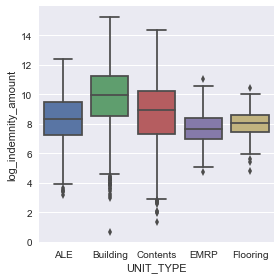

In [43]:
# Create new dataframe with only two columns but all the rows
# Because of double brackets the df2 variable is again a dataframe
df2 = df[['ACV_AMOUNT','RCV_AMOUNT']]
print df2.head(5)
print
print df2.corr()
print

# Create new dataframe, from the dataframe with the two columns, eliminating some rows; 
# the rows where RVC_AMOUNT is zero
df3 = df2[df2.RCV_AMOUNT != 0]
print df3.tail(5)
print
print df3.corr()
print

# show box plot for values of TOTAL_INDEMNITY_AMOUNT only after eliminating 
# rows with TOTAL_INDEMINTY _AMOUNT = 0
df4 = df[['TOTAL_INDEMNITY_AMOUNT', 'ACV_AMOUNT', 'UNIT_TYPE']] # creates df with three columns
df5 = df4[df4.TOTAL_INDEMNITY_AMOUNT != 0] # eliminates specified rows
print df5.head(5)

# check if there are very big values for TOTAL_INDEMNITY_AMOUNT 
# if so you need to do log transformation
print df5.TOTAL_INDEMNITY_AMOUNT.sort_values(ascending = False).head(5)
print df.TOTAL_INDEMNITY_AMOUNT.max()

# the TOTAL_INDEMNITY_AMOUNT needs to be log transformed 
# print df5['TOTAL_INDEMNITY_AMOUNT'].apply(np.log).plot(kind="hist") 
# prints plot of resulting dataframe

# ???? show box plot for values of TOTAL_INDEMNITY_AMOUNT, eliminating rows where
# ???? TOTAL_INDEMNITY_AMOUNT is zero BUT SPLIT BY UNIT_TYPE
# ???? UNIT_TYPES are not different columns; they are a LOV for a specific column

df5['log_indemnity_amount'] = df5.TOTAL_INDEMNITY_AMOUNT.apply(np.log)
print df5.head(5)
sns.factorplot(y='log_indemnity_amount',x='UNIT_TYPE',data = df5, kind='box')

# show box plot for values of TOTAL_INDEMNITY_AMOUNT by UNIT_TYPE
# print df['TOTAL_INDEMNITY_AMOUNT'].plot(kind="box")


[[<matplotlib.axes._subplots.AxesSubplot object at 0x117d36750>


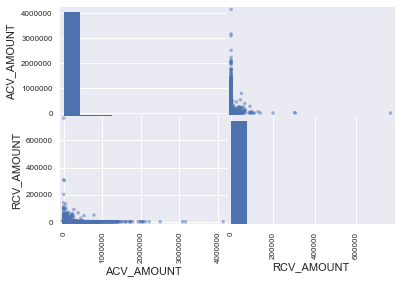

In [44]:
# show scatter plot showing relationship RCV_AMOUNT and ACV_AMOUNT
print pd.plotting.scatter_matrix(df2)



Axes(0.125,0.125;0.775x0.755)


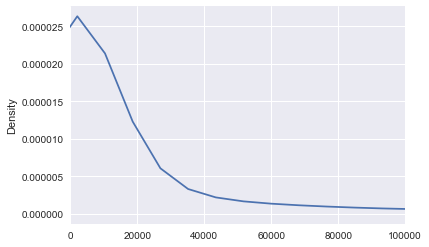

In [45]:
# Let's have a look at the probability densities of the ACV_AMOUNT
print df2["ACV_AMOUNT"].plot(kind="density", xlim=(0,100000))

Axes(0.125,0.125;0.775x0.755)


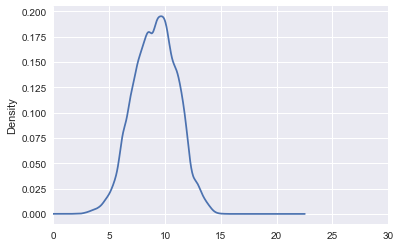

In [46]:
# Let's have a look at the probability densities of the log_indemnity_amount
print df5["log_indemnity_amount"].plot(kind="density", xlim=(0,30))

# looks a lot more like a normal distribution !


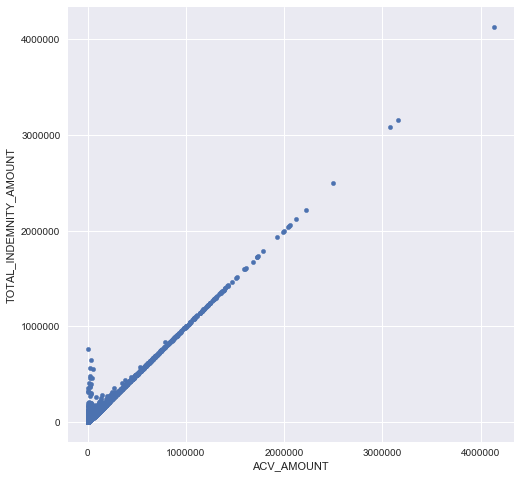

In [47]:
df.plot(kind='scatter', x='ACV_AMOUNT', y='TOTAL_INDEMNITY_AMOUNT', figsize=(8, 8))

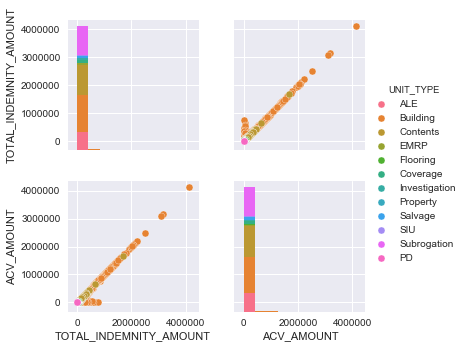

In [48]:
# Quick plot of the data using seaborn which I prefer over mathplotlib
# seaborn is simple and quick but leass configurable than mathplotlib

sns.pairplot(df4, hue="UNIT_TYPE")
sns.plt.show()

In [49]:
# this is the standard import if you're using "formula notation" (similar to R) and use statsmodel
import statsmodels.formula.api as smf

# create a fitted model in one line
# formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
# with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='TOTAL_INDEMNITY_AMOUNT ~ ACV_AMOUNT', data=df).fit()

#print the full summary
print lm.summary()
print
# print the coefficients
print lm.params

                              OLS Regression Results                              
Dep. Variable:     TOTAL_INDEMNITY_AMOUNT   R-squared:                       0.990
Model:                                OLS   Adj. R-squared:                  0.990
Method:                     Least Squares   F-statistic:                 4.544e+06
Date:                    Mon, 15 Jan 2018   Prob (F-statistic):               0.00
Time:                            10:54:10   Log-Likelihood:            -4.7374e+05
No. Observations:                   44646   AIC:                         9.475e+05
Df Residuals:                       44644   BIC:                         9.475e+05
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [50]:
# let's say you want to determine what this model predicts for TOTAL_INDEMNITY_AMOUNT when
# the ACV_AMOUNT is 100,000

# step 1: you have to create a DataFrame to capture the ACV_AMOUNT OF 100,000
# since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'ACV_AMOUNT': [100000]})
X_new.head()

# use the model to make predictions on a new value and print result
print lm.predict(X_new)


0    100674.092437
dtype: float64


In [51]:
# determine confidence in our model
print lm.pvalues
print lm.conf_int()

Intercept     1.267896e-31
ACV_AMOUNT    0.000000e+00
dtype: float64
                     0           1
Intercept   467.424308  655.364761
ACV_AMOUNT  1.000206    1.002048  


In [52]:
# from sklearn import linear_model --> I prefer sklearn over statsmodel

X = df[["ACV_AMOUNT"]]
y = df["TOTAL_INDEMNITY_AMOUNT"]

# Select the model to use; in this case linear regression model from sklearn
model = linear_model.LinearRegression()
# Fit the data to the model
results = model.fit(X, y)

# Print the coefficients
print results.intercept_, results.coef_

561.394534569 [ 1.00112698]


/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


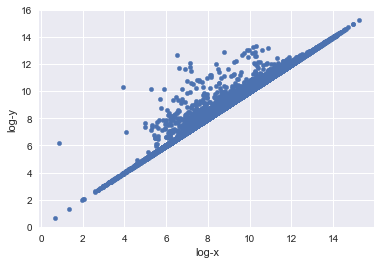

In [53]:
# if the relationship between ACV_TOTAL and TOTAL_INDEMNITY_AMOUNT is linear but error not
# normally distributed (as is the case here), you need to do the log transformation
# to both TOTAL_INDEMNITY_AMOUNT and to "ACV_AMOUNT

df5["log-y"] = np.log(df5['TOTAL_INDEMNITY_AMOUNT'])
df5["log-x"] = np.log(df5['ACV_AMOUNT'])
df5.plot.scatter(x='log-x', y='log-y')


In [54]:
# from sklearn import linear_model --> I prefer sklearn over statsmodel

X = df5[["ACV_AMOUNT"]] # apply here the new dummy columns
y = df5["log-y"]

# Select the model to use; in this case linear regression model from sklearn
model = linear_model.LinearRegression()
# Fit the data to the model
results = model.fit(X, y)

# Print the coefficients
print results.intercept_, results.coef_


8.75049648753 [  8.09269397e-06]


In [55]:
# look at what is currently part of df10 
# the set_option command ensures the columns are "wide enough" to see the content

pd.set_option('display.max_colwidth', -1) 
pd.set_option('display.height', 1000) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000)
df10.describe()

df.groupby('UNIT_TYPE').TOTAL_INDEMNITY_AMOUNT.describe()


height has been deprecated.



,count,mean,std,min,25%,50%,75%,max
UNIT_TYPE,,,,,,,,
ALE,6620.0,8069.228479,14489.059553,0.0,500.0000,2660.575,10043.3075,238000.00
Building,13387.0,66347.341005,170379.280129,0.0,1134.6650,10381.260,55985.2800,4133150.00
Contents,10717.0,18924.721888,41737.304176,0.0,0.0000,2538.540,19257.0100,1677851.42
Coverage,1152.0,0.000000,0.000000,0.0,0.0000,0.000,0.0000,0.00
EMRP,612.0,1774.663235,4633.268315,0.0,0.0000,0.000,1782.3050,60439.89
Flooring,160.0,3483.610500,4567.592089,0.0,648.9975,2060.920,4526.7125,34896.91
Investigation,464.0,0.000000,0.000000,0.0,0.0000,0.000,0.0000,0.00
PD,2.0,0.000000,0.000000,0.0,0.0000,0.000,0.0000,0.00
Property,12.0,0.000000,0.000000,0.0,0.0000,0.000,0.0000,0.00


In [56]:
y.describe()

count    24590.000000
mean     9.119010    
std      1.926945    
min      0.662688    
25%      7.741413    
50%      9.195710    
75%      10.497020   
max      15.234550   
Name: log-y, dtype: float64

In [57]:
X.describe()

,ACV_AMOUNT
count,2.459000e+04
mean,4.553656e+04
std,1.297948e+05
min,0.000000e+00
25%,2.140057e+03
50%,9.336645e+03
75%,3.500000e+04
max,4.133150e+06


In [21]:
# from sklearn import linear_model --> I prefer sklearn over statsmodel

# df10 is the dataframe that has the dummy columns for unit type (see above)
# before log transformation of TOTAL_INDEMNITY_AMOUNT, remove row with 
# TOTAL_INDEMNITY_AMOUNT = zero because log transaformation would be "infinite"

df11 = df10[df10.TOTAL_INDEMNITY_AMOUNT != 0] # eliminates specified rows
df11["log-y"] = np.log(df11['TOTAL_INDEMNITY_AMOUNT']) # does the log transformation



X = df11[["UNIT_TYPE_Contents","UNIT_TYPE_EMRP","UNIT_TYPE_Building","UNIT_TYPE_ALE"]] 
# apply here the new dummy columns
y = df11["log-y"]

# Select the model to use; in this case linear regression model from sklearn
model = linear_model.LinearRegression()
# Fit the data to the model
results = model.fit(X, y)

# Print the coefficients but transform it back from the log transformation by exponential function
# the coefficients are how the specific variable differs from the "base" variable whose column
# you did not include as a dummy column. In this case "base" is the Flooring Unit since it is
# not included above. Note that the "base" can not be only units that have no indemnity amount.
# I tried that and all coefficients became 1
print np.exp(results.intercept_), np.exp(results.coef_)

# These coefficient should be interpreted as follows:
# the 2769.34 is the base variable associated with Flooring (in thisa case)
# If the unit type is for example content, the indemnity 2.293 times the 2769.34


2769.34377274 [ 2.29345519  0.78196108  7.06725261  1.38982359]


/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
from sklearn import cross_validation
from sklearn import linear_model, metrics

# Do cross validation with 5 folds

kf = cross_validation.KFold(len(df11), n_folds=5, shuffle=True)
mse_values = []
scores = []
n= 0

print "~~~~ CROSS VALIDATION each fold ~~~~"
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    print np.exp(lm.intercept_), np.exp(lm.coef_)
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(X.iloc[test_index])))
    scores.append(lm.score(X, y))
    n+=1
    print 'Model', n
    print 'MSE:', mse_values[n-1]
    print 'R2:', scores[n-1]


print "~~~~ SUMMARY OF CROSS VALIDATION ~~~~"
print 'Mean of MSE for all folds:', np.mean(mse_values)
print 'Mean of R2 for all folds:', np.mean(scores)

# the folds all have slightly different results but what is most important is 
# to look at the mean MSE and the mean R2. In this case focus on R2 since MSE is
# harder to interpret given that it is unit dependent and after log transformation
# harder to interpret. The relatively low R2 value indicates that predicting the 
# TOTAL_INDEMNITY_AMOUNT using only the 4 specified dummy UNIT_TYPE columns will be very 
# inaccurate. It will only explain about 13% of the variance

~~~~ CROSS VALIDATION each fold ~~~~
3032.75113518 [ 2.10835993  0.70011691  6.36903581  1.25470059]
Model 1
MSE: 3.1565151389
R2: 0.13248064061
2639.2911897 [ 2.39391272  0.8331517   7.63327775  1.45036293]
Model 2
MSE: 3.20463421228
R2: 0.132419187734
2742.89370354 [ 2.30529681  0.80399981  7.11668045  1.41747121]
Model 3
MSE: 3.23380095764
R2: 0.132515862368
2806.14132942 [ 2.24347777  0.71006349  6.93314639  1.38381847]
Model 4
MSE: 3.26623719913
R2: 0.132489452465
2644.87318762 [ 2.42986156  0.87452542  7.34682089  1.45220484]
Model 5
MSE: 3.25105286572
R2: 0.132491438023
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 3.22244807473
Mean of R2 for all folds: 0.13247931624


In [ ]:
# So let's try to predict TOTAL_INDEMNITY AMOUNT using neural network
# using more than the 4 non-financial variables used above .....
# step 1: initiate required libraries including neural network model from keras
# step 2: define the neural network model
# step 3: prepare dataframe to use. Remember: in NN all variables used need to be numeric 
# (either discrete or continuous) so .....
# ------> 3a: add to df11 new (dummy) columns to enable NN to mine info from columns with a pre-defined 
#           list of value such as LOSS_LOC_STATE: each state will get its own dummy column with
#           either a 0 or a 1 (I have already done this for UNIT_TYPE in df11). 
#           Also make sure to set CURRENT_UNIT_STATUS to 1 or 0 (currently Closed or Open)
# ------> 3b: add to df11 new (dummy) columns to enable NN to mine info from column that have 
#           format free text such as POLICY_DESCRIPTION. The dummy columns will capture the main
#           features of the text in the POLICY_DESCRIPTION field. In general the main features 
#           are the most frequently occuring words and their frequency (it depends a bit on the 
#           algorithmn I use)
# ------> 3c: add to df11 new (dummy) columns that show dates in a numerical manner. This requires
#           transforming the columns with the data format as provided such as UNIT_CREATED_DATE
#           into several new columns that simply provide the year (one column), month (second 
#           column), day (third column) etcetera.
# ------> 3d: for this specific data set also add a column that shows the number of months 
#           between UNIT_CREATED_DATE and the date I pulled the information from the database
#           (which is Nov 2017, or the most recent UNIT_CREATED_DATE in the whole data set).
#           This number is the age of the claim in months and will likely be an important 
#           predictor of the TOTAL_INDEMNITY_AMOUNT
# ------> 3e: created dummy columns for another number of variables with list of values
#           similar to what we did for UNIT_TYPE and LOS_LOC_STATE
# step 4: fit the model
# step 5: train the model
# step 6: evaluate the quality of the model

In [58]:
# step 1: initiate required libraries including neural network model from keras

from __future__ import print_function
import random
import numpy as np
import pandas as pd
from math import sin

# conda install keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD   # Stochastic Gradient Descent

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import sklearn.cross_validation as cv

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 8)

Using TensorFlow backend.


In [59]:
# step 2: define a Feed Forward NN (neural network) model. Be aware; I need to update
# the number of input layers to make it equal to the number of columns of the matrix
# in other words to the number of input variables (the number of x's). 12 is no longer 
# valid

model = Sequential()

# add one layer with 12 input and 5 output dimensions (input to hidden layer)
# apply the tanh function to this layer
model.add(Dense(input_dim=12, output_dim=5))
model.add(Activation('tanh'))

# create the next layer with 5 inputs to 1 output dimension (hidden layer to output layer)
# since this is a regression problem, the function needs to be linear and one output dimension
model.add(Dense(input_dim=5, output_dim=1))
model.add(Activation('linear'))

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.01))

/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=5, input_dim=12)`
  
/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, input_dim=5)`
  # This is added back by InteractiveShellApp.init_path()


In [88]:
# step 3a: add to df11 new (dummy) columns to enable NN to mine info from columns with a 
# pre-defined list of value such as LOSS_LOC_STATE: each state will get its own dummy column with
# either a 0 or a 1 (I have already done this for UNIT_TYPE in df11). 
# Also create a new (dummy) column to make sure to translate CURRENT_UNIT_STATUS to 1 or 0
# (currently Closed or Open)

# create dummy variables using get_dummies for all possible values of LOS_LOC_STATE
LLS_dummies = pd.get_dummies(df.LOSS_LOC_STATE, prefix='LOSS_LOC_STATE').iloc[:, 0:]

# concatenate the dummy variable columns onto the original DataFrame 
# (axis=0 means rows, axis=1 means columns)
# note: concatenate allows you to combine two matrices next to eachother 
# (make sure they have the same number of rows!!!)

df12 = pd.concat([df11, LLS_dummies], axis=1)

# create a new Series called UnitIsClosed. This new (dummy) column indicates
# with a 1 if a unit is closed. It is the "translated" version op the original
# column CURRENT_UNIT_STATUS

df12['UnitIsClosed'] = df12.CURRENT_UNIT_STATUS.map({'Open':0, 'Closed':1})

print df12.head()

SyntaxError: invalid syntax (<ipython-input-88-02786c8833c3>, line 23)

In [75]:
# step 3b: add to df12 new (dummy) columns to enable NN to mine info from column that have 
# format free text such as POLICY_DESCRIPTION. The dummy columns will capture the main
# features of the text in the POLICY_DESCRIPTION field. In general the main features 
# are the most frequently occuring words and their frequency (it depends a bit on the 
# algorithmn I use, which in this case is CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

# identify that you are going to use the function mentioned below. This function creates 
# columns with the most frequently used 10 single words (excluding "stop words" in english)

vectorizer = CountVectorizer(max_features = 10, 
                             ngram_range=(1, 1), 
                             stop_words='english',
                             binary=True)

# Use `fit` to learn the vocabulary of the POLICY_DESCRIPTION
# while eliminating rows where there is no value in the field POLICY_DESCRIPTION
PolicyDescriptions = df12['POLICY_DESCRIPTION'].fillna('')
vectorizer.fit(PolicyDescriptions)

# Use `tranform` to generate the sample X word matrix - one column per feature (individual
# words or n-grams). So this function creates one column for each word with a maximum 
# of 10 columns (so will only show the most frequently used 10 words) and then indicate 
# whether that word occurs in the sentence or not

X = vectorizer.transform(PolicyDescriptions)

print X

# Command below shows how many rows / records the data has
# the only matrix elements shown are the elements with a 1 (and
# in front you see the row and column number)

print data.shape

# To check out what the feature names are that go with the columns
print vectorizer.get_feature_names()

# concatenate df12 with X to create df13. X is a matrix with the ten word frequency columns)
# (axis=0 means rows, axis=1 means columns)
# note: concatenate allows you to combine two matrices next to eachother 
# (make sure they have the same number of rows!!!)

df13 = pd.concat([df12, X], axis=1)

print df13.head()

SyntaxError: invalid syntax (<ipython-input-75-c6b6bdd85e47>, line 28)

In [77]:
# step 3c: add to df13 new (dummy) columns that show dates in a numerical manner. This requires
# transforming the columns with the data format as provided such as UNIT_CREATED_DATE
# into several new columns that simply provide the year (one column), month (second 
# column), day (third column) etcetera.

df13['date'] = pd.to_datetime(df13.UNIT_CREATED_DATE)

df13['MONTH_CREATED']=df13['date'].map(lambda x: x.month)
df13['YEAR_CREATED']=df13['date'].map(lambda x: x.year)

print  df13.head()

SyntaxError: invalid syntax (<ipython-input-77-614635dcf833>, line 11)

In [91]:
# step 3d: for this specific data set also add a column that shows the number of months 
# between UNIT_CREATED_DATE and the date I pulled the information from the database
# (which is Nov 2017, or the most recent UNIT_CREATED_DATE in the whole data set).
# This number is the age of the claim in months and will likely be an important 
# predictor of the TOTAL_INDEMNITY_AMOUNT

z = df13.MONTH_CREATED.max()
df14['AGE'] = df13[MONTH_CREATED]-z

print df14.head()

NameError: name 'df13' is not defined

In [79]:
# step 3e: also add dummy columns for following fields (all fields with 
# lists of values):"CAUSE_OF_LOSS","CAT_FLAG","INSURANCE_GRP_IND",
# "HEART_DIVISION_NAME"]]. Especially CAT_FLAG and INSURANCE_GRP_IND are
# "easy" because they can only have two values

# create dummy variables using get_dummies for all possible values of CAUSE_OF_LOSS
COL_dummies = pd.get_dummies(df14.CAUSE_OF_LOSS, prefix='COL').iloc[:, 0:]

# concatenate the dummy variable columns onto the original DataFrame 
# (axis=0 means rows, axis=1 means columns)
# note: concatenate allows you to combine two matrices next to eachother 
# (make sure they have the same number of rows!!!)

df15 = pd.concat([df14, COL_dummies], axis=1)

# create a new columns called COL_<....>. These new (dummy) column indicates
# with a 1 if a unit is the relevant cause of loss. 
# It is the "translated" version op the original column CAUSE_OF_LOSS

# Do the same for HEART_DIVISION_NAME
HDN_dummies = pd.get_dummies(df15.HEART_DIVISION_NAME, prefix='HDN').iloc[:, 0:]
df16 = pd.concat([df15, HDN_dummies], axis=1)

# Now create 2 new (dummy) columns; one that indicates if a unit is cat or not
# and one that indicates the insurance group

df16['UnitIsCAT'] = df16.CAT_FLAG.map({'N':0, 'Y':1})
df16['InsIs'] = df16.INSURANCE_GRP_IND.map({'FI':1, 'FM':0})

print df16.head()

SyntaxError: invalid syntax (<ipython-input-79-360befe8c65a>, line 30)

In [80]:
# Train the model

# define X1: all the relevant columns I want to use ....
# This includes: 
# (a) 5 new (dummy) unit type columns for UNIT_TYPE
# (b) 50 new (dummy) state columns for LOSS_LOC_STATE
# (c) 1 new (dummy) column for CURRENT_UNIT_STATUS
# (c) 10 new (dummy) word-feature columns for POLICY_DESCRIPTION
# (d) 2 new (dummy) columns for month and year for UNIT_CREATED_DATE
# (e) .......... I am missing the column that captures the age (in months) of the unit
# (f) x new (dummy) columns for CAUSE_OF_LOSS
# (g) x new (dummy) columns for HEART_DIVISION_NAME
# (h) 1 (dummy) columns for CAT_FLAG
# (i) 1 (dummy) column for INSURANCE_GRP_IND
# (j) ACV_AMOUNT (this column is a continuous variable and was present in the original data)

# define y1: this should the log function of TOTAL_INDEMNITY_AMOUNT (as previously
# calculated - see above) and captured in the column called "log-y"

# print the column names of the columns in the dataframe called df16
print df16.columns.values

# print for each of the possible values of LOSS_LOC_STATE how often it occurred in df16
df16.LOSS_LOC_STATE.value_counts()


X1 = df14[["CURRENT_UNIT_STATUS","UNIT_CREATED_DATE","LOSS_LOC_STATE","CAUSE_OF_LOSS",
           "POLICY_DESCRIPTION","CAT_FLAG","INSURANCE_GRP_IND","HEART_DIVISION_NAME",
           "UNIT_TYPE_Contents","UNIT_TYPE_EMRP","UNIT_TYPE_Building","ACV_AMOUNT",
           "UNIT_TYPE_SIU"]] 
y1 = df14["log-y"]

print('Training...')
loss = model.fit(X1, y1, nb_epoch=500, validation_split=0.1, 
                 batch_size=128, verbose=False)
print(loss.history['loss'][-1])
print("Done")

SyntaxError: invalid syntax (<ipython-input-80-09b678181975>, line 21)

In [92]:
# How do I determine the outcome for Y with a specific input set of the input variables?
# and how do I evaluate the quality of this prediction (using MSE and/or other metric)

# X must be a unique combination of all input variables
# I assume a scatter plot is not relevant because X is not a single number but a 
# combination of values for many input variables. Having said this I assume that
# it is very relevant to look at MSE?

predictions = model.predict(X)
# Plot the predictions if it were relevant:
# plt.scatter(X, y, alpha=0.5)
# plt.plot(X, predictions, color='r', linewidth=2)
# plt.show()

print("MSE", mean_squared_error(predictions, y))

ValueError: Error when checking : expected dense_1_input to have shape (None, 12) but got array with shape (24590, 1)

In [ ]:
# Can I do cross validation with neural networks (so k fold cross validation with NN)
# XGBoost combines different weak learner models of decision trees to come up with a
# better model. Is there an algorithmn to combine NNs instead of decision trees?